In [16]:
%reset

In [4]:
import numpy as np
import pandas as pd

In [5]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [6]:
%reload_ext autoreload
%autoreload 1

In [7]:
from hydroplotting import funcutils as fc

In [8]:
#read in data
path_flow_obs = ROOT_DIR + '/Data/Raw/12147600_ref.csv'
path_flow_model = ROOT_DIR + '/Data/Raw/12147600_sim.day'


In [75]:
flow_obs = pd.read_csv(path_flow_obs,  header = None)
flow_obs.columns = ['year', 'month', 'day', 'Q_cms']



In [76]:
#divide flow obs into

,year,month,day,Q_cms,water_year,water_year_str,datetime
datetime,,,,,,,
1959-12-01,1959,12,1,90.0,1960,1960,1959-12-01
1959-12-02,1959,12,2,110.0,1960,1960,1959-12-02
1959-12-03,1959,12,3,110.0,1960,1960,1959-12-03
1959-12-04,1959,12,4,90.0,1960,1960,1959-12-04
1959-12-05,1959,12,5,80.0,1960,1960,1959-12-05
...,...,...,...,...,...,...,...
2022-06-01,2022,6,1,104.0,2022,2022,2022-06-01
2022-06-02,2022,6,2,119.0,2022,2022,2022-06-02
2022-06-03,2022,6,3,161.0,2022,2022,2022-06-03


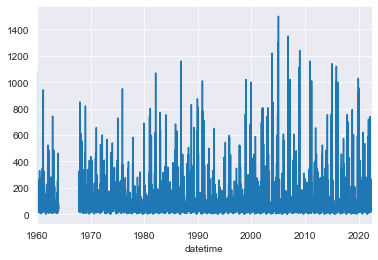

In [78]:
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
flow_obs = flow_obs.set_index('datetime')
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
fc.calc_water_year_apply(flow_obs)
flow_obs['water_year_str'] = flow_obs['water_year'].astype(str)
flow_obs.Q_cms.plot()
flow_obs

In [73]:
flow_obs_to_plot = flow_obs.rolling(window=3, center=True, win_type='triang').mean()
flow_obs_to_plot = flow_obs_to_plot.iloc[1: , :]
flow_obs_to_plot['datetime'] = pd.to_datetime(flow_obs_to_plot[['year', 'month', 'day']])

ValueError: cannot assemble the datetimes: unconverted data remains: 48

In [72]:
flow_obs_to_plot

,year,month,day,Q_cms
1,1959.0,12.00,2.00,105.000
2,1959.0,12.00,3.00,105.000
3,1959.0,12.00,4.00,92.500
4,1959.0,12.00,5.00,82.500
5,1959.0,12.00,6.00,85.000
...,...,...,...,...
22828,2022.0,5.75,8.75,104.075
22829,2022.0,6.00,2.00,125.750
22830,2022.0,6.00,3.00,143.750
22831,2022.0,6.00,4.00,153.500


In [70]:
flow_obs_to_plot['doy'] = flow_obs_to_plot.index.dayofyear
tst = flow_obs_to_plot.index.dayofyear

AttributeError: 'RangeIndex' object has no attribute 'dayofyear'

In [67]:
flow_obs_to_plot['datetime'] = pd.to_datetime(flow_obs_to_plot[['year', 'month', 'day']])
flow_obs_to_plot

ValueError: cannot assemble the datetimes: unconverted data remains: 48

In [69]:
flow_obs_to_plot

,year,month,day,Q_cms
1,1959.0,12.00,2.00,105.000
2,1959.0,12.00,3.00,105.000
3,1959.0,12.00,4.00,92.500
4,1959.0,12.00,5.00,82.500
5,1959.0,12.00,6.00,85.000
...,...,...,...,...
22828,2022.0,5.75,8.75,104.075
22829,2022.0,6.00,2.00,125.750
22830,2022.0,6.00,3.00,143.750
22831,2022.0,6.00,4.00,153.500


In [68]:
type(flow_obs_to_plot)

pandas.core.frame.DataFrame

In [12]:
flow_model = pd.read_csv(path_flow_model, sep='\s+', header = None)
flow_model.columns = ['year', 'month', 'day', 'Q_cms']

In [13]:
flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
flow_model = flow_model.set_index('datetime')

flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])

In [14]:
#apply water year
fc.calc_water_year_apply(flow_model)
flow_model['water_year_str'] = flow_model['water_year'].astype(str)
flow_model

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1981-01-01,1981,1,1,293.0442,1981-01-01,1981,1981
1981-01-02,1981,1,2,150.0163,1981-01-02,1981,1981
1981-01-03,1981,1,3,54.5583,1981-01-03,1981,1981
1981-01-04,1981,1,4,26.4289,1981-01-04,1981,1981
1981-01-05,1981,1,5,15.0847,1981-01-05,1981,1981
...,...,...,...,...,...,...,...
2015-12-27,2015,12,27,8.1309,2015-12-27,2016,2016
2015-12-28,2015,12,28,8.1614,2015-12-28,2016,2016
2015-12-29,2015,12,29,10.3486,2015-12-29,2016,2016


In [15]:
flow_model_by_wy = flow_model.groupby(['water_year_str'])
flow_obs_by_wy = flow_obs.groupby(['water_year_str'])

In [16]:
wy_groups = flow_model_by_wy.groups
#wy_groups
wy_groups.keys()

dict_keys(['1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])

In [17]:
model_2012 = flow_model_by_wy.get_group('2012')
#or, get a specific year with this
#model_flow_2011 = flow_model[flow_model['water_year'] == 1981]


In [18]:
obs_2012 = flow_obs_by_wy.get_group('2012')
#or, get a specific year with this
#model_flow_2011 = flow_model[flow_model['water_year'] == 1981]
obs_2012


,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
2011-10-01,2011,10,1,12.00,2011-10-01,2012,2012
2011-10-02,2011,10,2,11.30,2011-10-02,2012,2012
2011-10-03,2011,10,3,12.30,2011-10-03,2012,2012
2011-10-04,2011,10,4,14.20,2011-10-04,2012,2012
2011-10-05,2011,10,5,21.40,2011-10-05,2012,2012
...,...,...,...,...,...,...,...
2012-09-26,2012,9,26,3.78,2012-09-26,2012,2012
2012-09-27,2012,9,27,3.74,2012-09-27,2012,2012
2012-09-28,2012,9,28,3.63,2012-09-28,2012,2012


In [19]:
nse_test = fc.nse(model_2012['Q_cms'], obs_2012['Q_cms'])
nse_test

0.48930157154117193

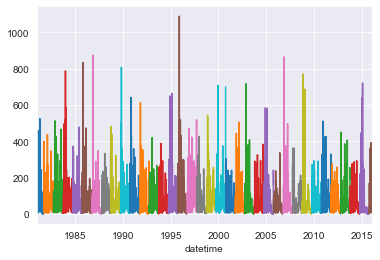

In [49]:
#initialize list
nse = []
year = []
for group in flow_obs_by_wy:
    for gr in flow_model_by_wy:
        if group[0]==gr[0]:
            nse_test = fc.nse(gr[1].Q_cms, group[1].Q_cms)
            gr[1].Q_cms.plot()
            year.append(group[0])
            nse.append(nse_test)
            #nse(0) = gr[0]
            #nse(1) = nse_test
nse_run = dict(zip(year, nse))

In [47]:
nse_run

{'1981': 0.8402541835197412,
 '1982': 0.5286291052808738,
 '1983': 0.7016799281597919,
 '1984': 0.7988162949747949,
 '1985': 0.4287479006656687,
 '1986': 0.7071633873837162,
 '1987': 0.7951986703851903,
 '1988': 0.5321582779440033,
 '1989': 0.6292894560521705,
 '1990': 0.5720342291346088,
 '1991': 0.5744185738528943,
 '1992': 0.5856670070118106,
 '1993': 0.5476666694453621,
 '1994': 0.4874486022535852,
 '1995': 0.6085688830623861,
 '1996': 0.5009628694179389,
 '1997': 0.3524360178368272,
 '1998': 0.5025401956481181,
 '1999': 0.541655296927573,
 '2000': 0.69307644264811,
 '2001': 0.519153271307301,
 '2002': 0.6695686019934726,
 '2003': 0.6380313784077992,
 '2004': 0.42197707358029046,
 '2005': 0.5476646306811702,
 '2006': 0.5195843348492722,
 '2007': 0.7472362383256288,
 '2008': 0.5829829346529684,
 '2009': 0.7520624419558526,
 '2010': 0.471549915159556,
 '2011': 0.5581562973245633,
 '2012': 0.48930157154117193,
 '2013': 0.3929725497765534,
 '2014': 0.555285864721327,
 '2015': 0.6691765

In [52]:
flow_model

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1981-01-01,1981,1,1,293.0442,1981-01-01,1981,1981
1981-01-02,1981,1,2,150.0163,1981-01-02,1981,1981
1981-01-03,1981,1,3,54.5583,1981-01-03,1981,1981
1981-01-04,1981,1,4,26.4289,1981-01-04,1981,1981
1981-01-05,1981,1,5,15.0847,1981-01-05,1981,1981
...,...,...,...,...,...,...,...
2015-12-27,2015,12,27,8.1309,2015-12-27,2016,2016
2015-12-28,2015,12,28,8.1614,2015-12-28,2016,2016
2015-12-29,2015,12,29,10.3486,2015-12-29,2016,2016


In [58]:
test = flow_model.resample('M').mean()
multi_month_mean = flow_model.groupby(flow_model.index.month).mean()
multi_month_mean

,year,month,day,Q_cms,water_year
datetime,,,,,
1,1998.0,1.0,16.000000,58.744221,1998.0
2,1998.0,2.0,14.617409,43.539496,1998.0
3,1998.0,3.0,16.000000,49.916095,1998.0
4,1998.0,4.0,15.500000,40.849832,1998.0
5,1998.0,5.0,16.000000,62.381640,1998.0
6,1998.0,6.0,15.500000,63.778767,1998.0
7,1998.0,7.0,16.000000,37.044614,1998.0
8,1998.0,8.0,16.000000,17.022378,1998.0
9,1998.0,9.0,15.500000,20.956174,1998.0


In [53]:
#calculate monthly flows
flow_model_month = flow_model.groupby(pd.PeriodIndex(flow_model['datetime'], freq="M"))['Q_cms'].mean()
flow_obs_month = flow_obs.groupby(pd.PeriodIndex(flow_obs['datetime'], freq="M"))['Q_cms'].mean()

KeyError: 'datetime'

In [50]:
#plot modeled SWE vs. observed at Skookum Creek
ax = flow_model_month.plot(kind='line',  y = 'Q_cms', label = 'model Q')
flow_obs_month.plot(kind='line',  y = 'Q_cms', label = 'obs Q', ax = ax)
ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

NameError: name 'flow_model_month' is not defined